In [1]:
# This code now can work well, it is suitbal for both MNIST and fashion-MNIST
from __future__ import print_function
import keras
# from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from keras.utils.vis_utils import plot_model

In [2]:
#load mnist dataset
# (X_train, y_train), (X_test, y_test) = mnist.load_data() 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
#everytime loading data won't be so easy :)

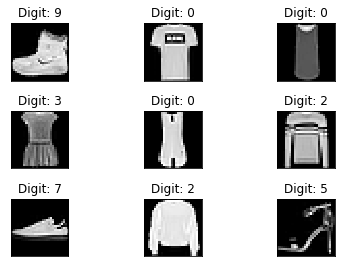

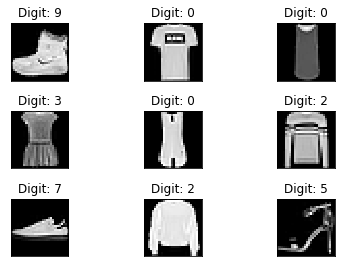

In [3]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [6]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [8]:
#set number of categories
num_category = 10

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_category)
y_test = keras.utils.np_utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(3, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
# model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#Choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(100, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.2))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

In [11]:
batch_size = 128
num_epoch = 100
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/100
469/469 [==============================] - 9s 17ms/step - loss: 1.0853 - accuracy: 0.6300 - val_loss: 0.6324 - val_accuracy: 0.7805
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.6648 - accuracy: 0.7640 - val_loss: 0.5447 - val_accuracy: 0.8032
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.5862 - accuracy: 0.7880 - val_loss: 0.5004 - val_accuracy: 0.8185
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5471 - accuracy: 0.8024 - val_loss: 0.4796 - val_accuracy: 0.8260
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5216 - accuracy: 0.8125 - val_loss: 0.4568 - val_accuracy: 0.8347
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.5011 - accuracy: 0.8187 - val_loss: 0.4455 - val_accuracy: 0.8383
Epoch 7/100
469/469 [==============================] - 6s 14ms/step - loss: 0.4825 - accuracy: 0.8274 - val_loss: 0.4319 - val_accuracy:

469/469 [==============================] - 6s 14ms/step - loss: 0.3042 - accuracy: 0.8885 - val_loss: 0.2950 - val_accuracy: 0.8943
Epoch 58/100
469/469 [==============================] - 7s 15ms/step - loss: 0.3004 - accuracy: 0.8899 - val_loss: 0.2924 - val_accuracy: 0.8951
Epoch 59/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2994 - accuracy: 0.8898 - val_loss: 0.2930 - val_accuracy: 0.8946
Epoch 60/100
469/469 [==============================] - 7s 15ms/step - loss: 0.3013 - accuracy: 0.8893 - val_loss: 0.2925 - val_accuracy: 0.8955
Epoch 61/100
469/469 [==============================] - 8s 18ms/step - loss: 0.2979 - accuracy: 0.8899 - val_loss: 0.2925 - val_accuracy: 0.8947
Epoch 62/100
469/469 [==============================] - 8s 18ms/step - loss: 0.2974 - accuracy: 0.8911 - val_loss: 0.2907 - val_accuracy: 0.8958
Epoch 63/100
469/469 [==============================] - 11s 24ms/step - loss: 0.2965 - accuracy: 0.8921 - val_loss: 0.2879 - val_accuracy: 0.89

In [12]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2686944007873535
Test accuracy: 0.9045000076293945


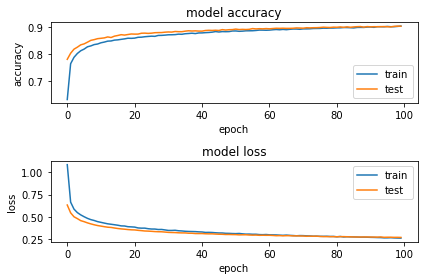

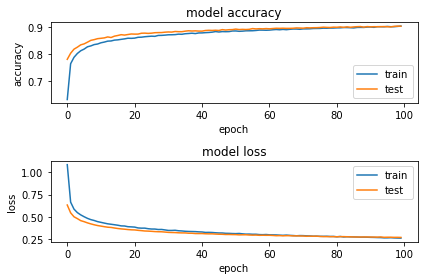

In [13]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [14]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
import numpy
numpy.savetxt("D:\\Python\\My_Python\\deep-learning-cnn\\val_accuracy_simulation.txt", model_log.history['val_accuracy'])

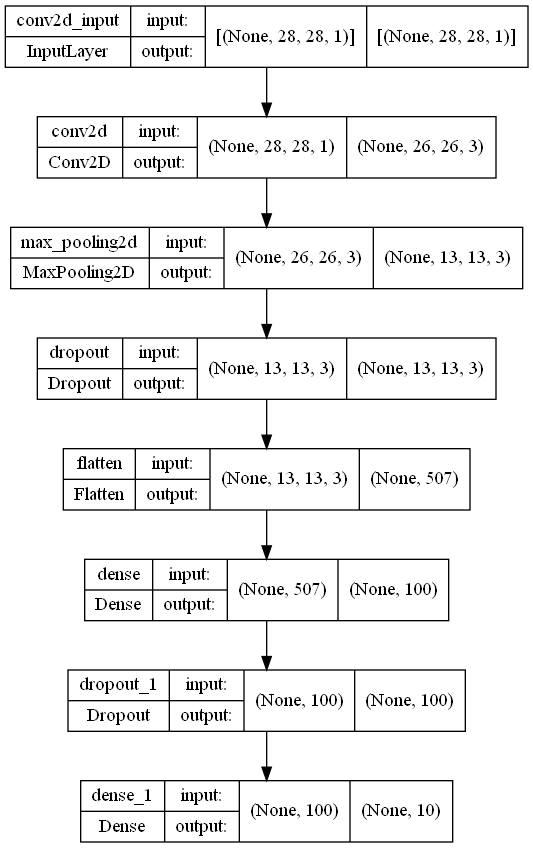

In [16]:
plot_model(model, to_file='Flatten.png', show_shapes=True)